In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os


def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df_final = pd.DataFrame(index=dates)
    
    # add SPY for reference, if absent
    if "SPY" not in symbols:  
        symbols.insert(0, "SPY")

    for symbol in symbols:
        file_path = symbol_to_path(symbol)
        df_temp = pd.read_csv(
            file_path,
            parse_dates=True,
            index_col="Date",
            usecols=["Date", "Adj Close"],
            na_values=["nan"])
        df_temp = df_temp.rename(columns={"Adj Close": symbol})
        df_final = df_final.join(df_temp)
        
        # drop dates SPY did not trade
        if symbol == "SPY":  
            df_final = df_final.dropna(subset=["SPY"])

    return df_final


def plot_data(df_data, title="Stock Data"):
    """Plot stock data with appropriate axis labels."""
    ax = df_data.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

#### Fill forward

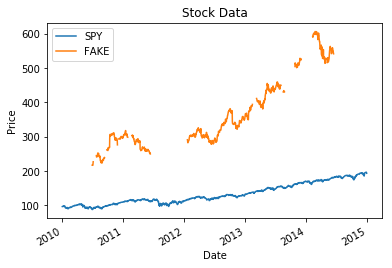

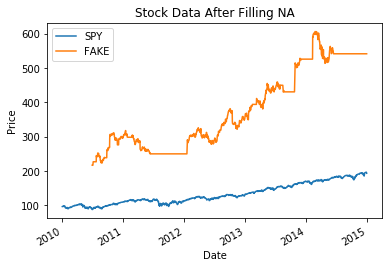

In [3]:
symbol_list = ["FAKE"]
start_date = "2010-01-01"
end_date = "2014-12-31"
dates = pd.date_range(start_date, end_date)

# Get data
df_data = get_data(symbol_list, dates)

# Plot data
plot_data(df_data)

# Fill missing values
df_data.fillna(method="ffill", inplace=True)

# Plot data after filling
plot_data(df_data, title="Stock Data After Filling NA")

#### Fill backward

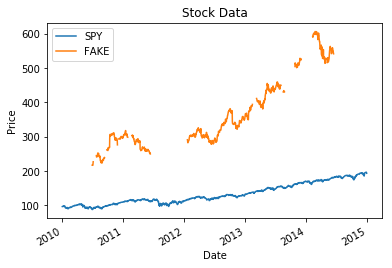

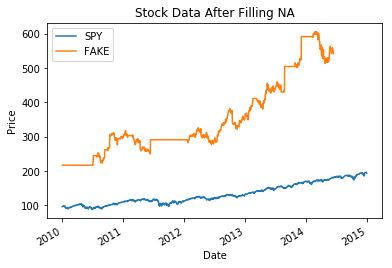

In [4]:
symbol_list = ["FAKE"]
start_date = "2010-01-01"
end_date = "2014-12-31"
dates = pd.date_range(start_date, end_date)

# Get data
df_data = get_data(symbol_list, dates)

# Plot data
plot_data(df_data)

# Fill missing values
df_data.fillna(method="bfill", inplace=True)

# Plot data after filling
plot_data(df_data, title="Stock Data After Filling NA")

#### Fill Missiing values
Note: Always fill forward 1st then backward

In [5]:
def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    df_data.fillna(method="ffill", inplace=True)
    df_data.fillna(method="bfill", inplace=True)

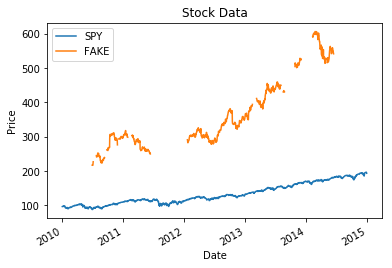

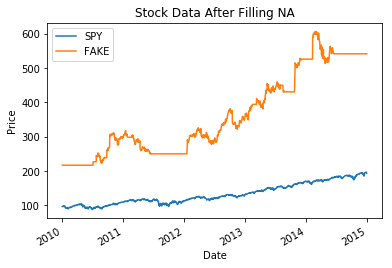

In [6]:
symbol_list = ["FAKE"]
start_date = "2010-01-01"
end_date = "2014-12-31"
dates = pd.date_range(start_date, end_date)

# Get data
df_data = get_data(symbol_list, dates)

# Plot data
plot_data(df_data)

# Fill missing values
fill_missing_values(df_data)

# Plot data after filling
plot_data(df_data, title="Stock Data After Filling NA")